In [11]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import a_mert_ffnn_keras_cv as fn

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('mert_test_results-2.csv')
# iterate over the rows of the DataFrame
for index, row in df.iterrows():
    # get the Window Size, Hidden Layer Size and Initial Size values
    window_size = int(row['Window Size'])
    hidden_layer_size = int(row['Hidden Layers'])
    initial_size = int(row['Initial Size'])
    
    #build the model
    model = fn.build_ffnn_model(window_size, hidden_layer_size, initial_size)
    #calculate the number of tunable parameters in the model
    num_params = model.count_params()     
    
    # get the tunable parameters count (skip the dropout layers)
    #tunable_params = fn.get_tunable_parameters(model)
    
    # Update the DataFrame with the mean values
    df.at[index, 'trainable parameters'] = num_params

# sort the DataFrame by MSE
df = df.sort_values(by='MSE', ascending=True)
# Display the DataFrame as an HTML table
display(HTML(df.to_html()))

# CV-MSE (avg): 196.6268, Window size: 16, Hidden Layers: 1, Initial Size: 256. Progress: 24/120
# CV-MSE (avg): 224.2533, Window size: 16, Hidden Layers: 2, Initial Size: 256. Progress: 28/120
# CV-MSE (avg): 187.7398, Window size: 32, Hidden Layers: 1, Initial Size: 128. Progress: 38/120
# CV-MSE (avg): 326.2261, Window size: 40, Hidden Layers: 1, Initial Size: 64. Progress: 49/120 ????
# CV-MSE (avg): 322.2811, Window size: 50, Hidden Layers: 1, Initial Size: 64. Progress: 61/120 ???
# CV-MSE (avg): 293.8887, Window size: 50, Hidden Layers: 1, Initial Size: 128. Progress: 62/120 ???
# CV-MSE (avg): 264.7587, Window size: 50, Hidden Layers: 1, Initial Size: 256. Progress: 63/120 +
# CV-MSE (avg): 236.9781, Window size: 50, Hidden Layers: 2, Initial Size: 256. Progress: 66/120 +

,Window Size,Hidden Layers,Initial Size,MSE,trainable parameters
4,8,1,256,120.960764,35329.0
19,8,4,256,128.306839,46081.0
9,8,2,256,134.212497,43521.0
3,8,1,128,140.447191,9473.0
14,8,3,256,141.886342,45569.0
8,8,2,128,150.643521,11521.0
38,32,1,256,158.343450,41473.0
13,8,3,128,160.075743,12033.0
2,8,1,64,173.328975,2689.0
37,32,1,128,177.376158,12545.0


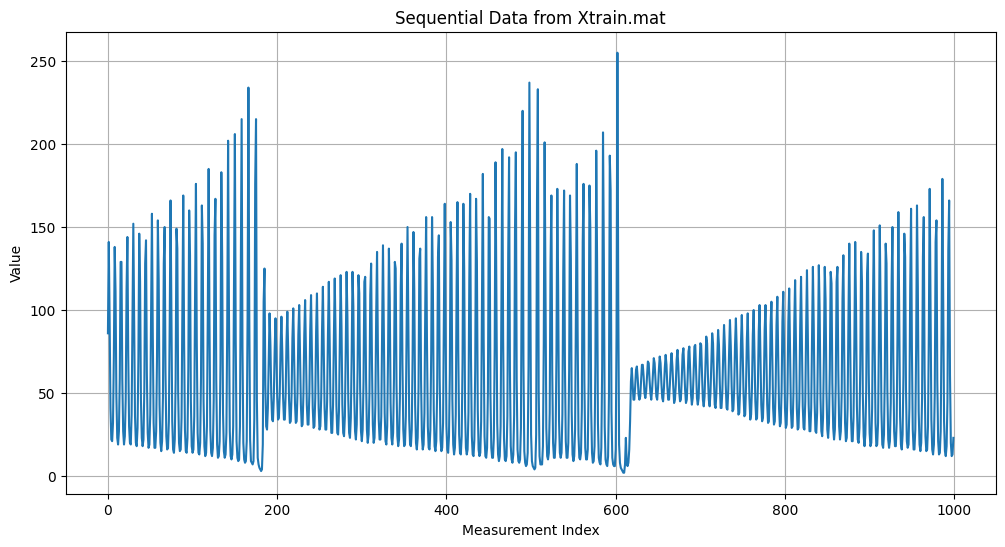

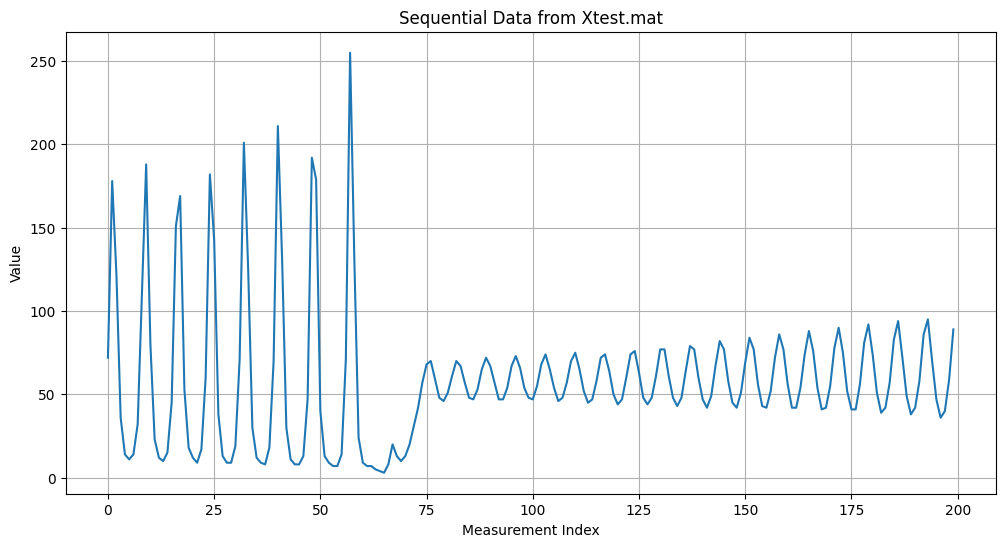

In [2]:
# %%
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from matplotlib import pyplot as plt
import pandas as pd
import scipy
from statsmodels.tsa.ar_model import AutoReg
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import numpy as np
import a_mert_ffnn_keras_cv as fn

#This is the .mat file as data frame.
__mat_data__ = scipy.io.loadmat('Xtrain.mat')
    # Convert to DataFrame, there is only one variable in the .mat file
df = pd.DataFrame(__mat_data__['Xtrain']) 

# %% [markdown]
# ## Data Inspection
# We will inspect the data to understand its structure and characteristics in the Xtrain.mat file.
# It contains a single variable, which appears to be sequential data, like a time series. 
# See the visualization of the data below:
plt.figure(figsize=(12, 6))
plt.plot(df[0])
plt.title('Sequential Data from Xtrain.mat')
plt.xlabel('Measurement Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

#This is the .mat file as data frame.
__mat_data__ = scipy.io.loadmat('Xtest.mat')
    # Convert to DataFrame, there is only one variable in the .mat file
df = pd.DataFrame(__mat_data__['Xtest']) 

# %% [markdown]
# ## Data Inspection
# We will inspect the data to understand its structure and characteristics in the Xtrain.mat file.
# It contains a single variable, which appears to be sequential data, like a time series. 
# See the visualization of the data below:
plt.figure(figsize=(12, 6))
plt.plot(df[0])
plt.title('Sequential Data from Xtest.mat')
plt.xlabel('Measurement Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()